# Artificial Intelligence - Lab 1

In this laboratory we will build our first linear classifier: the Perceptron. We will write the mathematical formula and the learning algorithm which serve to modify the model's weights. At last, we will demonstrate its efficacy in learning two simple logical functions (linearly separable) and its limit in fitting a more complex logical function (non linearly separable).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

The Perceptron is described by the following scheme, which binarizes the output exploiting a step-wise activation function:

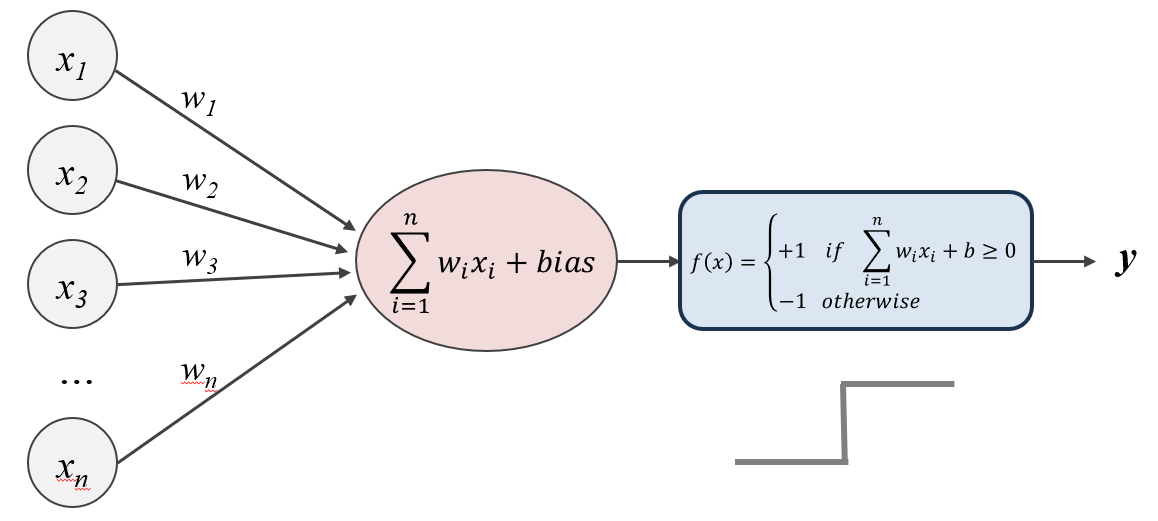

## The logic function AND
The logic function AND, also named *logical conjuction*, is described by the following "truth table".

|X|Y|X AND Y|
|-|-|-|
|F|F|F|
|F|T|F|
|T|F|F|
|T|T|T|

This table will be the input for training our Perceptron, with logical values converted to 0 and 1 values.

In [3]:
input_and = np.array([[0, 0],
                      [0, 1],
                      [1, 0],
                      [1, 1]])
target_and = np.array([0,
                       0,
                       0,
                       1])

The logical function AND is *linearly separable*, indeed if we plot the 0 and 1 pairs there is a straight line which separates the input defined by the logical function as true (red dot) or false (blue dots).

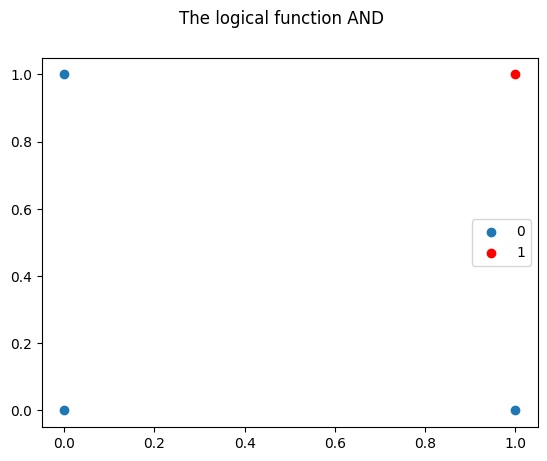

In [4]:
plt.scatter(input_and[:3, 0], input_and[:3, 1])            # plot the first three points in blue (output = False)
plt.scatter(input_and[3, 0], input_and[3, 1], color='red') # plot the last point in red (output = True)
plt.legend(['0', '1'])
__ = plt.suptitle("The logical function AND")

In [5]:
def target_perceptron(y):  # convert output 0 to -1 to allow training using the Perceptron learning rule
  new_y = y.copy()
  new_y[new_y == 0] = -1
  return new_y

We are now ready to define the Perceptron training function. We define it in two versions: one using the step activation function and one using the sigmoid activation function.

In [6]:
def step(x):  # define a step activation function
  if x >=0:
    return 1
  else:
    return -1

In [7]:
def sigmoid(x):   # define a sigmoid activation function
  return 1 / (1 + np.exp(-x))

In [ ]:
def train_perceptron_step(inputs, targets):
  mean_error_values = []  # keep track of model's error
  W = np.zeros(2)         # initialize perceptron weights W and bias b to 0
  b = np.zeros(1)

  learning_rate = 0.3  # specify the learning rate
  for epoch in range(100):  # repeat the learning step for a maximum of 100 epochs
    mean_error = 0
    print("Parameters values W:", W, "and b:", b)
    for input, target in zip(inputs, targets):  # loop through each training sample
      pre_activation = np.dot(W, input) + b[0]  # compute the pre-activation value (weighted sum + bias)
      output = step(pre_activation)             # apply the step-wise activation function to compute the binarized output

      ### learning step ###
      error = target - output
      W_change = learning_rate * error * input
      b_change = learning_rate * error
      print("input:", input, "output:", output, " \ttarget:", target, " \terror:", error, " \tW_change:", W_change, " \tb_change:", b_change)
      W += W_change  # update the parameters (W and b) of the Perceptron
      b += b_change
      mean_error += abs(error) # compute the mean error by summing all absolute errors...

    mean_error /= len(inputs)  # ...and dividing by the number of patterns (four)
    mean_error_values.append(mean_error)

    print(f"Mean error at epoch {epoch + 1}:\n", mean_error)
    if mean_error == 0: # if the mean error is 0 we stop the learning process
      break

In [ ]:
def train_perceptron_sigm(inputs, targets):
  mean_squared_error_values = []  # keep track of model's errors
  W = np.random.rand(2)   # initialize Perceptron's parameters based on a uniform distribution
  b = np.random.rand(1)

  learning_rate = 0.3  # specify the learning rate
  for epoch in range(500):  # repeat the learning step for 500 epochs
    mean_squared_error = 0
    for input, target in zip(inputs, targets):  # loop over all training samples
      pre_activation = np.dot(W, input) + b[0]  # compute the pre-activation value
      output = sigmoid(pre_activation)          # apply the activation function to compute the (almost binarized) output

      ### learning step ###
      error = target - output
      gradient_W = error * output * (1 - output)  # gradient of the error function (error * derivative of the sigmoid)
      W_delta = learning_rate * gradient_W * input
      b_delta = learning_rate * error
      W += W_delta  # update model's parameters
      b += b_delta
      mean_squared_error += error**2 # compute the mean error by summing all squared errors...

    mean_squared_error /= len(inputs)  # ...and dividing by the number of patterns (four)
    mean_squared_error_values.append(mean_squared_error)

  return mean_squared_error_values  # rather than printing the error values, here we return them to be saved in a vector

In [ ]:
train_perceptron_step(input_and, target_perceptron(target_and))

In [ ]:
error_and = train_perceptron_sigm(input_and, target_and)

In [ ]:
plt.plot(range(len(error_and)), error_and)
plt.ylim((0,0.5));

## The logic function OR
The logic function OR, also named logical *disjunction*, can be described with the following truth table.

|X|Y|X AND Y|
|-|-|-|
|F|F|F|
|F|T|T|
|T|F|T|
|T|T|T|

Again in this case we will use the corresponding binary values for training our Perceptron with this function.

In [ ]:
input_or = np.array([[0, 0],
                     [0, 1],
                     [1, 0],
                     [1, 1]])
target_or = np.array([0,
                      1,
                      1,
                      1])

Also the logical function OR is linearly separable:

In [ ]:
plt.scatter(input_or[0, 0], input_or[0, 1])
plt.scatter(input_or[1:, 0], input_or[1:, 1], color='red')
plt.legend(['0', '1'])
plt.suptitle("The logical function OR");

In [ ]:
train_perceptron_step(input_or, target_perceptron(target_or))

In [ ]:
error_or = train_perceptron_sigm(input_or, target_or)

In [ ]:
__ = plt.plot(range(len(error_or)), error_or)
plt.ylim((0,0.5))

## The logical function XOR
The logical function (exclusive OR) it's represented by the following truth table.

|X|Y|X AND Y|
|-|-|-|
|F|F|F|
|F|T|T|
|T|F|T|
|T|T|F|

We will try to train our Perceptron on this data, altough this time we will encounter a problem.

In [ ]:
input_xor = np.array([[0, 0],
                      [0, 1],
                      [1, 0],
                      [1, 1]])
target_xor = np.array([0,
                       1,
                       1,
                       0])

As we can observe in the plot below, the function XOR is not linearly separable, indeed we can't find a line which divides our input according to the true (red dots) and false values (blue dots) indicated by the logical function XOR.

In [ ]:
plt.scatter(input_or[[0, 3], 0], input_or[[0, 3], 1])
plt.scatter(input_or[[1, 2], 0], input_or[[1, 2], 1], color='red')
plt.legend(['0', '1'])
__ = plt.suptitle("The logical function XOR")

In [ ]:
train_perceptron_step(input_xor, target_perceptron(target_xor))

In [ ]:
error_xor = train_perceptron_sigm(input_xor, target_xor)

In [ ]:
plt.plot(range(len(error_xor)), error_xor);
plt.ylim((0,0.5))

## Application to a real dataset

We will now apply our Perceptron to a real case scenario. We will use the heart disease dataset [heart disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease), publicly available. The dataset contains medical information of multiple subjects, among whom some have cardiac phatologies. The classification goal is to distinguish subjects with a cardiac condition from healthy subjects. Hence, it is a **binary classification** problem.

In [ ]:
%%capture
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

In [ ]:
import pandas as pd

In [ ]:
heart_disease = pd.read_csv("processed.cleveland.data",
                            names=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"],
                            na_values='?')
heart_disease = heart_disease.dropna()
heart_disease.num = heart_disease.num.apply(lambda x: 0 if x == 0 else 1) # convert into binary output to distinguish heart disease presence (values 1,2,3,4) from absence (value 0)
heart_disease.head(10)

We keep aside 30 samples to test the final model.

In [ ]:
heart_disease_test = heart_disease.iloc[:30, :]   # use first 30 subjects for testing
heart_disease_train = heart_disease.iloc[30:, :]  # usa all remaining subjects for training

Transform the samples and labels into vectors (`NumPy` array).

In [ ]:
hd_in_tr = heart_disease_train.loc[:, "age":"thal"].to_numpy()
hd_out_tr = heart_disease_train.num.to_numpy(dtype=np.float64)

In [ ]:
hd_in_te = heart_disease_test.loc[:, "age":"thal"].to_numpy()
hd_out_te = heart_disease_test.num.to_numpy(dtype=np.float64)

To facilitate the learning process we standardize the input values by column to have mean 0 and variance 1.

In [ ]:
hd_in_tr = ((hd_in_tr - hd_in_tr.mean(axis=0)) / hd_in_tr.std(axis=0))
hd_in_te = ((hd_in_te - hd_in_te.mean(axis=0)) / hd_in_te.std(axis=0))

We redefine the training function to adjust the number of parameters in the model (in this case we have an input vector of 13 elements) and change the value of some hyperparameters: learning rate and the number of epochs. Finally, we will set the function to return also the model's parameters to use them for a final prediction on the left-out test set.

In [ ]:
def train_perceptron_sigm(inputs, targets):
  mean_squared_error_values = []  # keep track of model's errors
  W = np.random.rand(13) # initialize Perceptron's parameters based on a uniform distribution with boundaries [-1, 1]
  b = np.random.rand(1)

  learning_rate = 0.05  # specify the learning rate
  for epoch in range(400):  # repeat the learning process for 400 steps
    mean_squared_error = 0
    for input, target in zip(inputs, targets):  # loop over all training samples
      pre_activation = np.dot(W, input) + b[0]  # compute the pre-activation value
      output = sigmoid(pre_activation)          # apply the activation function to compute the activation value

      ### learning ###
      error = target - output
      gradient_W = error * output * (1 - output)
      W_delta = learning_rate * gradient_W * input
      b_delta = learning_rate * error
      W += W_delta  # update model's parameters
      b += b_delta
      mean_squared_error += error**2

    mean_squared_error /= len(inputs)
    mean_squared_error_values.append(mean_squared_error)

  return mean_squared_error_values, W, b

In [ ]:
error_heart, W, b = train_perceptron_sigm(hd_in_tr, hd_out_tr)

In [ ]:
__ = plt.plot(range(len(error_heart)), error_heart)
plt.ylim((0,0.4));

Now we evaluate the perceptron on the left-out test set.

In [ ]:
preds = []
for sample in hd_in_te:
  pred = sigmoid(W @ sample + b)
  preds.append(pred)

Compare with the true labels and measure classification accuracy:



In [ ]:
correct = 0
print('Prob\t Out\t Target')
for p, target in zip(preds, hd_out_te):
  binarized_output = p > 0.5
  print('%.3f \t %i \t %i' % (p, binarized_output, target))
  if binarized_output == target:
    correct = correct + 1

print('Accuracy: %.2f' % (correct / len(preds)))


Hands-on practice!



1. Change the code to make it possible to calculate (and print) the probabilities, binary output and target values for the AND, OR or XOR problems. Note that this will require to return the weights and bias from the training function.
2. Plot both the AND and OR training curves on the same graph.
3. Play with the hyperparameters to speed-up training on the heart disease dataset.


